In [1]:
import sys
print(sys.version)
%pwd
#git clone https://github.com/fastai/fastai.git
#cd fastai
#conda env update
#conda activate fastai

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]


'C:\\Users\\chrun\\Documents\\Projects\\Deep Learning\\structured data\\Google Analytics Customer Revenue'

In [2]:
!pip install fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *
PATH = 'data/'

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

  Using cached https://files.pythonhosted.org/packages/5f/e9/bac4204fe9cb1a002ec6140b47f51affda1655379fe302a1caef421f9846/torch-0.1.2.post1.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\chrun\AppData\Local\Temp\pip-install-t7u0jzd9\torch\setup.py", line 11, in <module>
        raise RuntimeError(README)
    RuntimeError: PyTorch does not currently provide packages for PyPI (see status at https://github.com/pytorch/pytorch/issues/566).
    
    Please follow the instructions at http://pytorch.org/ to install with miniconda instead.
    
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\chrun\AppData\Local\Temp\pip-install-t7u0jzd9\torch\
C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques --force

In [ ]:
#!mv sample_submission.csv data
#!mv data_description.txt data
#!mv test.csv data
#!mv train.csv data

In [ ]:
#!rm -rf sample_submission.csv.gz
#!rm -rf test.csv.gz
#!rm -rf train.csv.gz

In [ ]:
'''
def load_df(csv_path='data/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df
'''

In [ ]:
df_train = load_df()
#df_large = load_df(nrows=500000)
#df_test = load_df("data/test.csv")

In [ ]:
#df_train.to_csv("train-flattened-large.csv", index=False)
#df_test.to_csv("test-flattened-large.csv", index=False)

In [ ]:
len(df_train[df_train['fullVisitorId'].duplicated()])

In [69]:
PATH = 'data/'

In [70]:
pd.read_csv(PATH + 'sample_submission.csv').head()

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.0
1,0000049363351866189,0.0
2,0000053049821714864,0.0
3,0000059488412965267,0.0
4,0000085840370633780,0.0


In [71]:
from IPython.display import HTML, display
table_names = ['train-flattened-large', 'test-flattened']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [72]:
train, test = tables

In [ ]:
len(train),len(test)

In [ ]:
train.head()

In [ ]:
train.head().T.head(82)

In [ ]:
#from pandas.io.json import json_normalize

In [ ]:
len(train.columns), len(test.columns)

In [ ]:
train.nunique()

In [ ]:
df = train
test_df = test

In [ ]:
for v in df.columns: 
    if df[v].nunique() <= 1: 
        df.drop(v, axis=1, inplace=True)
        if v in test_df.columns:
            test_df.drop(v, axis=1, inplace=True)
#23

In [ ]:
df.nunique(), test_df.nunique()

In [ ]:
len(df.columns), len(test_df.columns)

In [ ]:
df.isna().any()

In [ ]:
#DataFrameSummary(df).summary()

In [ ]:
df.info()

In [ ]:
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)
#df[['totals.transactionRevenue']] = df[['totals.transactionRevenue']].fillna(value=0)
df['totals.transactionRevenue'].min(), df['totals.transactionRevenue'].max()

In [ ]:
df['channelGrouping'] = df['channelGrouping'].astype(str) #cat
df['totals.hits'] = df['totals.hits'].astype(float) #cont
df['totals.pageviews'] = df['totals.pageviews'].astype(float) #cont
df['trafficSource.adContent'] = df['trafficSource.adContent'].astype(str) #cat

df['trafficSource.adwordsClickInfo.adNetworkType'] = df['trafficSource.adwordsClickInfo.adNetworkType'].astype(str) #cat
df['trafficSource.adwordsClickInfo.gclId'] = df['trafficSource.adwordsClickInfo.gclId'].astype(str) #cat
df['trafficSource.adwordsClickInfo.page'] = df['trafficSource.adwordsClickInfo.page'].astype(float) #cat
df['trafficSource.adwordsClickInfo.slot'] = df['trafficSource.adwordsClickInfo.slot'].astype(str) #cat
df['trafficSource.campaign'] = df['trafficSource.campaign'].astype(str) #cat
df['trafficSource.keyword'] = df['trafficSource.keyword'].astype(str) #cat
df['trafficSource.medium'] = df['trafficSource.medium'].astype(str) #cat
df['trafficSource.referralPath'] = df['trafficSource.referralPath'].astype(str) #cat
df['trafficSource.medium'] = df['trafficSource.medium'].astype(str) #cat
df['trafficSource.source'] = df['trafficSource.source'].astype(str) #cat

df['device.browser'] = df['device.browser'].astype(str) #cat
df['device.deviceCategory'] = df['device.deviceCategory'].astype(str) #cat
df['device.isMobile'] = df['device.isMobile'].astype(bool) #cat
df['device.operatingSystem'] = df['device.operatingSystem'].astype(str) #cat

df['geoNetwork.city'] = df['geoNetwork.city'].astype(str) #cat
df['geoNetwork.continent'] = df['geoNetwork.continent'].astype(str) #cat
df['geoNetwork.country'] = df['geoNetwork.country'].astype(str) #cat
df['geoNetwork.metro'] = df['geoNetwork.metro'].astype(str) #cat
df['geoNetwork.networkDomain'] = df['geoNetwork.networkDomain'].astype(str) #cat
df['geoNetwork.region'] = df['geoNetwork.region'].astype(str) #cat
df['geoNetwork.subContinent'] = df['geoNetwork.subContinent'].astype(str) #cat

df['fullVisitorId'] = df['fullVisitorId'].astype(str) #cat
df['visitId'] = df['visitId'].astype(str) #cat

In [ ]:
test_df['totals.transactionRevenue'] = 0
test_df['totals.transactionRevenue'] = test_df['totals.transactionRevenue'].astype(float)
test_df['channelGrouping'] = test_df['channelGrouping'].astype(str) #cat
test_df['totals.hits'] = test_df['totals.hits'].astype(float) #cont
test_df['totals.pageviews'] = test_df['totals.pageviews'].astype(float) #cont
test_df['trafficSource.adContent'] = test_df['trafficSource.adContent'].astype(str) #cat

test_df['trafficSource.adwordsClickInfo.adNetworkType'] = test_df['trafficSource.adwordsClickInfo.adNetworkType'].astype(str) #cat
test_df['trafficSource.adwordsClickInfo.gclId'] = test_df['trafficSource.adwordsClickInfo.gclId'].astype(str) #cat
test_df['trafficSource.adwordsClickInfo.page'] = test_df['trafficSource.adwordsClickInfo.page'].astype(float) #cat
test_df['trafficSource.adwordsClickInfo.slot'] = test_df['trafficSource.adwordsClickInfo.slot'].astype(str) #cat
test_df['trafficSource.campaign'] = test_df['trafficSource.campaign'].astype(str) #cat
test_df['trafficSource.keyword'] = test_df['trafficSource.keyword'].astype(str) #cat
test_df['trafficSource.medium'] = test_df['trafficSource.medium'].astype(str) #cat
test_df['trafficSource.referralPath'] = test_df['trafficSource.referralPath'].astype(str) #cat
test_df['trafficSource.medium'] = test_df['trafficSource.medium'].astype(str) #cat
test_df['trafficSource.source'] = test_df['trafficSource.source'].astype(str) #cat

test_df['device.browser'] = test_df['device.browser'].astype(str) #cat
test_df['device.deviceCategory'] = test_df['device.deviceCategory'].astype(str) #cat
test_df['device.isMobile'] = test_df['device.isMobile'].astype(bool) #cat
test_df['device.operatingSystem'] = test_df['device.operatingSystem'].astype(str) #cat

test_df['geoNetwork.city'] = test_df['geoNetwork.city'].astype(str) #cat
test_df['geoNetwork.continent'] = test_df['geoNetwork.continent'].astype(str) #cat
test_df['geoNetwork.country'] = test_df['geoNetwork.country'].astype(str) #cat
test_df['geoNetwork.metro'] = test_df['geoNetwork.metro'].astype(str) #cat
test_df['geoNetwork.networkDomain'] = test_df['geoNetwork.networkDomain'].astype(str) #cat
test_df['geoNetwork.region'] = test_df['geoNetwork.region'].astype(str) #cat
test_df['geoNetwork.subContinent'] = test_df['geoNetwork.subContinent'].astype(str) #cat

test_df['fullVisitorId'] = test_df['fullVisitorId'].astype(str) #cat
test_df['visitId'] = test_df['visitId'].astype(str) #cat

In [ ]:
# checked datatype of each column and if it's categorical
#df['geoNetwork.subContinent'].unique() 

In [ ]:
df['date'] = pd.to_datetime(train['date'], format="%Y%m%d")
test_df['date'] = pd.to_datetime(train['date'], format="%Y%m%d")

In [ ]:
df['date'].head(), test_df['date'].head()

In [ ]:
add_datepart(df, "date", drop=False)
add_datepart(test_df, "date", drop=False)

In [ ]:
len(df.columns), len(test_df.columns)

In [ ]:
df.columns

In [ ]:
test_df.columns

In [ ]:
#pd.set_option('display.max_columns', 500)
#DataFrameSummary(df).summary()

In [ ]:
train_df.head()

In [ ]:
test_df.columns.duplicated()

In [ ]:
train_df.to_pickle("train_df")
test_df.to_pickle("test_df")

# New Entry point with flattened dataframe

In [642]:

cat_vars = ['channelGrouping',# 'fullVisitorId', 'sessionId', 'visitId',
            'trafficSource.adwordsClickInfo.adNetworkType',
            'trafficSource.adwordsClickInfo.gclId', 
            'trafficSource.adwordsClickInfo.page', 'trafficSource.adContent', 
            'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
            'trafficSource.keyword', 'trafficSource.medium',
            'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
            'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
            'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
            'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
            'geoNetwork.subContinent', 'date']

contin_vars = ['visitNumber', 'totals.hits', 'totals.pageviews']

'''
high_null_columns = [c for c in train_df.columns if train_df[c].count()<=len(train_df) * 0.3]
high_null_columns = np.delete(high_null_columns, -1)
high_null_columns

train_df = train_df.drop(high_null_columns, axis=1)
test_df = test_df.drop(high_null_columns, axis=1)

cat_vars = ['channelGrouping', 'trafficSource.campaign',
            'trafficSource.keyword', 'trafficSource.medium',
            'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
            'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
            'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
            'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
            'geoNetwork.subContinent', 'date']

contin_vars = ['visitNumber', 'totals.hits', 'totals.pageviews']
'''

"\nhigh_null_columns = [c for c in train_df.columns if train_df[c].count()<=len(train_df) * 0.3]\nhigh_null_columns = np.delete(high_null_columns, -1)\nhigh_null_columns\n\ntrain_df = train_df.drop(high_null_columns, axis=1)\ntest_df = test_df.drop(high_null_columns, axis=1)\n\ncat_vars = ['channelGrouping', 'trafficSource.campaign',\n            'trafficSource.keyword', 'trafficSource.medium',\n            'trafficSource.referralPath', 'trafficSource.source', 'device.browser',\n            'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',\n            'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',\n            'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',\n            'geoNetwork.subContinent', 'date']\n\ncontin_vars = ['visitNumber', 'totals.hits', 'totals.pageviews']\n"

In [643]:
train_df = pd.read_csv("data/train-flattened-large.csv", low_memory=False)
test_df  = pd.read_csv("data/test-flattened.csv", low_memory=False)

In [644]:
train_df['time'] = train_df.visitStartTime.apply(lambda x: datetime.datetime.utcfromtimestamp(float(x)))
test_df['time'] = test_df.visitStartTime.apply(lambda x: datetime.datetime.utcfromtimestamp(float(x)))
train_df.drop('visitStartTime', axis = 1, inplace = True)
test_df.drop('visitStartTime', axis = 1, inplace = True)

In [645]:
dep = 'totals.transactionRevenue'
test_df[dep] = 0

In [646]:
train_df = train_df[cat_vars + contin_vars + [dep, 'time']].copy()

In [647]:
test_df = test_df[cat_vars + contin_vars + [dep, 'time', 'fullVisitorId']].copy()

In [648]:
len(test_df)

804684

In [649]:
#for v in cat_vars: train_df[v] = train_df[v].fillna(-999).astype('category').cat.as_ordered()
#for v in cat_vars: test_df[v] = test_df[v].fillna(-999).astype('category').cat.as_ordered()

for v in cat_vars: 
    print(v)
    train_df[v] = train_df[v].astype('category').cat.as_ordered()

channelGrouping
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adContent
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
device.browser
device.deviceCategory
device.isMobile
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
date


In [650]:
apply_cats(test_df, train_df)

In [651]:
!pip install scikit-learn
from sklearn.preprocessing import Imputer

In [652]:
train_df.isna().sum()

channelGrouping                                      0
trafficSource.adwordsClickInfo.adNetworkType    882193
trafficSource.adwordsClickInfo.gclId            882092
trafficSource.adwordsClickInfo.page             882193
trafficSource.adContent                         892707
trafficSource.adwordsClickInfo.slot             882193
trafficSource.campaign                               0
trafficSource.keyword                           502929
trafficSource.medium                                 0
trafficSource.referralPath                      572712
trafficSource.source                                 0
device.browser                                       0
device.deviceCategory                                0
device.isMobile                                      0
device.operatingSystem                               0
geoNetwork.city                                      0
geoNetwork.continent                                 0
geoNetwork.country                                   0
geoNetwork

In [653]:
for v in contin_vars:
    train_df[v] = train_df[v].astype('float32')
    test_df[v] = test_df[v].astype('float32')
    
imputer = Imputer()
#values = train_df[contin_vars].values
train_df[contin_vars] = imputer.fit_transform(train_df[contin_vars])
#values = test_df[contin_vars].values
test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

    
train_df[dep] = train_df[dep].astype('float32')

In [654]:
train_df['date'] = pd.to_datetime(train_df['date'], format="%Y%m%d")
test_df['date'] = pd.to_datetime(test_df['date'], format="%Y%m%d")

add_datepart(train_df, "time", drop=False, time=True)
add_datepart(test_df, "time", drop=False, time=True)

In [655]:
#idxs = get_cv_idxs(n, val_pct=150000/n)
#train_indexed = train_df.iloc[idxs].set_index("date")
#samp_size = len(train_indexed); samp_size

train_df = train_df.sort_values(by='time') 
test_df = test_df.sort_values(by='time')

train_indexed = train_df.set_index("time")
samp_size = len(train_indexed); samp_size

903653

In [656]:
train_indexed['totals.transactionRevenue'] = train_indexed['totals.transactionRevenue'].fillna(0)

In [657]:
train_indexed['date'] = train_indexed['date'].astype('category').cat.as_ordered()

In [658]:
train_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 903653 entries, 2016-08-01 07:00:12 to 2017-08-02 06:59:53
Data columns (total 43 columns):
channelGrouping                                 903653 non-null category
trafficSource.adwordsClickInfo.adNetworkType    21460 non-null category
trafficSource.adwordsClickInfo.gclId            21561 non-null category
trafficSource.adwordsClickInfo.page             21460 non-null category
trafficSource.adContent                         10946 non-null category
trafficSource.adwordsClickInfo.slot             21460 non-null category
trafficSource.campaign                          903653 non-null category
trafficSource.keyword                           400724 non-null category
trafficSource.medium                            903653 non-null category
trafficSource.referralPath                      330941 non-null category
trafficSource.source                            903653 non-null category
device.browser                                  903653 no

In [659]:
df, y, nas, mapper = proc_df(train_indexed, 'totals.transactionRevenue', do_scale=True)

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 903653 entries, 2016-08-01 07:00:12 to 2017-08-02 06:59:53
Data columns (total 42 columns):
channelGrouping                                 903653 non-null int8
trafficSource.adwordsClickInfo.adNetworkType    903653 non-null int8
trafficSource.adwordsClickInfo.gclId            903653 non-null int16
trafficSource.adwordsClickInfo.page             903653 non-null int8
trafficSource.adContent                         903653 non-null int8
trafficSource.adwordsClickInfo.slot             903653 non-null int8
trafficSource.campaign                          903653 non-null int8
trafficSource.keyword                           903653 non-null int16
trafficSource.medium                            903653 non-null int8
trafficSource.referralPath                      903653 non-null int16
trafficSource.source                            903653 non-null int16
device.browser                                  903653 non-null int8
device.deviceCategory  

In [661]:
test_indexed = test_df.set_index("time")
test_indexed['date'] = test_indexed['date'].astype('category').cat.as_ordered()

In [662]:
df_test, _, nas, mapper = proc_df(test_indexed, 'totals.transactionRevenue', do_scale=True, 
                                  skip_flds=['fullVisitorId'], mapper=mapper, na_dict=nas)

In [663]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804684 entries, 2017-08-02 07:00:03 to 2018-05-01 06:56:58
Data columns (total 42 columns):
channelGrouping                                 804684 non-null int8
trafficSource.adwordsClickInfo.adNetworkType    804684 non-null int8
trafficSource.adwordsClickInfo.gclId            804684 non-null int16
trafficSource.adwordsClickInfo.page             804684 non-null int8
trafficSource.adContent                         804684 non-null int8
trafficSource.adwordsClickInfo.slot             804684 non-null int8
trafficSource.campaign                          804684 non-null int8
trafficSource.keyword                           804684 non-null int16
trafficSource.medium                            804684 non-null int8
trafficSource.referralPath                      804684 non-null int16
trafficSource.source                            804684 non-null int16
device.browser                                  804684 non-null int8
device.deviceCategory  

In [664]:
df_test

,channelGrouping,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adContent,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,...,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeHour,timeMinute,timeSecond,timeElapsed
time,,,,,,,,,,,,,,,,,,,,,
2017-08-02 07:00:03,5,0,0,0,0,0,1,12,6,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.708109,-1.531602,1.845455
2017-08-02 07:00:13,4,0,0,0,0,0,1,0,5,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.708109,-0.953871,1.845456
2017-08-02 07:00:16,5,0,0,0,0,0,1,12,6,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.708109,-0.780551,1.845456
2017-08-02 07:00:39,5,0,0,0,0,0,1,12,6,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.708109,0.548231,1.845459
2017-08-02 07:01:20,5,0,0,0,0,0,1,12,6,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.650301,-0.549459,1.845463
2017-08-02 07:01:27,8,0,0,0,0,0,1,0,7,823,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.650301,-0.145047,1.845464
2017-08-02 07:01:28,3,0,0,0,0,0,1,0,1,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.650301,-0.087273,1.845464
2017-08-02 07:01:41,5,0,0,0,0,0,1,12,6,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.650301,0.663778,1.845466
2017-08-02 07:02:03,3,0,0,0,0,0,1,0,1,0,...,-0.188978,-0.191112,-0.097919,-0.090245,-0.038881,-0.036904,-0.810080,-1.592494,-1.531602,1.845468


In [665]:
df.head()

,channelGrouping,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adContent,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,...,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeHour,timeMinute,timeSecond,timeElapsed
time,,,,,,,,,,,,,,,,,,,,,
2016-08-01 07:00:12,3,0,0,0,0,0,1,0,1,0,...,-0.188978,5.232521,-0.097919,-0.090245,-0.038881,-0.036904,-0.81008,-1.708109,-1.011644,-1.659530
2016-08-01 07:04:26,8,0,0,0,0,0,1,0,7,1343,...,-0.188978,5.232521,-0.097919,-0.090245,-0.038881,-0.036904,-0.81008,-1.476879,-0.202820,-1.659502
2016-08-01 07:04:41,5,0,0,0,0,0,1,12,6,0,...,-0.188978,5.232521,-0.097919,-0.090245,-0.038881,-0.036904,-0.81008,-1.476879,0.663778,-1.659500
2016-08-01 07:06:01,5,0,0,0,0,0,1,12,6,0,...,-0.188978,5.232521,-0.097919,-0.090245,-0.038881,-0.036904,-0.81008,-1.361265,-1.647149,-1.659491
2016-08-01 07:06:10,3,0,0,0,0,0,1,0,1,0,...,-0.188978,5.232521,-0.097919,-0.090245,-0.038881,-0.036904,-0.81008,-1.361265,-1.127190,-1.659490


In [666]:
train_ratio = 0.8
train_size = int(samp_size * train_ratio)
val_idx = list(range(train_size, len(df))); len(val_idx)

180731

In [667]:
n = len(df)
samp_size = n

In [668]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [669]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [670]:
yl = np.log1p(y)

In [671]:
len(np.unique(yl))

5333

In [672]:
yl

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [673]:
max_y = np.max(yl)

In [674]:
y_range = (0, max_y*1.2)

In [675]:
len(val_idx), len(yl)

(180731, 903653)

In [676]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=256, test_df=df_test)

In [677]:
train_df.columns

Index(['channelGrouping', 'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.page', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'date', 'visitNumber', 'totals.hits',
       'totals.pageviews', 'totals.transactionRevenue', 'time', 'timeYear',
       'timeMonth', 'timeWeek', 'timeDay', 'timeDayofweek', 'timeDayofyear',
       'timeIs_month_end', 'timeIs_month_start', 'timeIs_quarter_end',
       'timeIs_quarter_start', 'timeIs_year_end', 'timeIs_year_start',
       

In [678]:
cat_sz = [(c, len(train_indexed[c].cat.categories)+1) for c in cat_vars]

In [679]:
cat_sz

[('channelGrouping', 9),
 ('trafficSource.adwordsClickInfo.adNetworkType', 3),
 ('trafficSource.adwordsClickInfo.gclId', 17775),
 ('trafficSource.adwordsClickInfo.page', 9),
 ('trafficSource.adContent', 45),
 ('trafficSource.adwordsClickInfo.slot', 3),
 ('trafficSource.campaign', 11),
 ('trafficSource.keyword', 3660),
 ('trafficSource.medium', 8),
 ('trafficSource.referralPath', 1476),
 ('trafficSource.source', 381),
 ('device.browser', 55),
 ('device.deviceCategory', 4),
 ('device.isMobile', 3),
 ('device.operatingSystem', 21),
 ('geoNetwork.city', 650),
 ('geoNetwork.continent', 7),
 ('geoNetwork.country', 223),
 ('geoNetwork.metro', 95),
 ('geoNetwork.networkDomain', 28065),
 ('geoNetwork.region', 377),
 ('geoNetwork.subContinent', 24),
 ('date', 367)]

In [680]:
emb_szs = [(c, max(10, min(50, (c+1)//2))) for _,c in cat_sz]

In [681]:
emb_szs

[(9, 10),
 (3, 10),
 (17775, 50),
 (9, 10),
 (45, 23),
 (3, 10),
 (11, 10),
 (3660, 50),
 (8, 10),
 (1476, 50),
 (381, 50),
 (55, 28),
 (4, 10),
 (3, 10),
 (21, 11),
 (650, 50),
 (7, 10),
 (223, 50),
 (95, 48),
 (28065, 50),
 (377, 50),
 (24, 12),
 (367, 50)]

In [682]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.01, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [683]:
m.lr_find()

epoch      trn_loss   val_loss                                                                                         
    0      4.115296   4.649852  


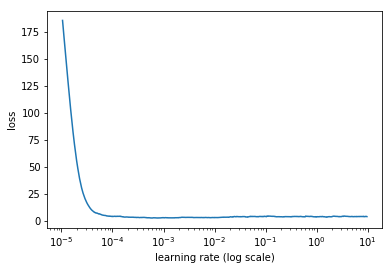

In [684]:
m.sched.plot()

In [ ]:
lr = 10**-4.6

In [ ]:
lr

In [ ]:
m.fit(lr, 1, cycle_len = 3, metrics=[exp_rmse])

In [ ]:
m.save("customer_revenue_3e")

In [ ]:
m.load("customer_revenue_3e")

In [ ]:
m.fit(lr, 2, cycle_len = 3, metrics=[exp_rmse])

In [ ]:
m.save("customer_revenue_9e")

In [693]:
m.load("customer_revenue_9e")

In [691]:
m.fit(lr, 3, cycle_len = 3, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.5865     3.12267    1.693404  
    1      2.363829   3.117342   1.691344                                                                              
    2      2.491337   3.173325   1.708112                                                                              
    3      2.565836   3.062021   1.677544                                                                              
    4      2.507601   3.385668   1.766223                                                                              
    5      2.47527    3.251506   1.727754                                                                              
    6      2.223111   3.252218   1.72948                                                                               
    7      2.419463   3.172531   1.707411                                                                           

[array([3.33268]), 1.749545848857448]

In [692]:
m.save("customer_revenue_15e")

# Test Set

In [1]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

NameError: name 'm' is not defined

In [695]:
log_preds = m.predict(True)

In [696]:
log_preds

array([[0.00178],
       [3.38551],
       [0.00333],
       ...,
       [0.00065],
       [0.00935],
       [0.00151]], dtype=float32)

In [697]:
log_test = log_preds

In [698]:
log_test

array([[0.00178],
       [3.38551],
       [0.00333],
       ...,
       [0.00065],
       [0.00935],
       [0.00151]], dtype=float32)

In [699]:
test['PredictedLogRevenue'] = log_test 

In [700]:
test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,PredictedLogRevenue
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google,0.001778
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,3.385511
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,0.003335
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,0.004051
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,4.091033


In [701]:
len(test['fullVisitorId'].unique())

617242

In [702]:
test_grouped = test.groupby(['fullVisitorId'], as_index=False).agg({'PredictedLogRevenue':'sum'})

In [703]:
csv_fn=f'{PATH}submission.csv'

test_grouped[['fullVisitorId','PredictedLogRevenue']].to_csv(csv_fn, index=False)

In [704]:
test_grouped

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.019484
1,0000049363351866189,0.011649
2,0000053049821714864,0.039793
3,0000059488412965267,0.032669
4,0000085840370633780,0.020779
5,0000091131414287111,0.016328
6,0000117255350596610,0.001236
7,0000118334805178127,0.000660
8,0000130646294093000,0.003901
9,0000150005271820273,0.001068
